### Decision Tree Regression
當數據集的輸出為連續性數值時，該樹算法就是一個迴歸樹。透過樹的展開，並用葉節點的均值作為預測值。

### 迴歸樹該如何選擇切割點?

透過評估指標找出誤差最小的值作為樹的特徵選擇與切割點

1. Mean Square Error (MSE)
2. Mean Absolute Error (MAE)

### CART決策樹
1. scikit-learn 決策樹演算法採用CART(Classification and Regression Tree)樹演算法
2. 可以做分類和迴歸預測
3. 在每一個節點上都是採用二分法

### 決策樹的總結
1. 決策樹透過所有特徵與對應的值將資料切分
2. 樹的深度越深，過度擬合機率越高

### Example 1 (簡單線性回歸)
簡單線性回歸舉例， $$ y=ax+b $$ ，a稱為斜率 ， b稱為截距

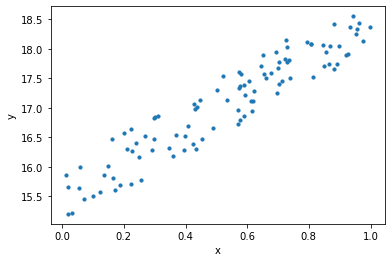

In [1]:
#import 
import numpy as np
import matplotlib.pyplot as plt

#產生亂數資料
np.random.seed(0)
noise = np.random.rand(100,1)  #0~1之間 隨機取100個
x = np.random.rand(100,1)
y = 3 * x + 15 +noise          # y=ax+b Target function a=3,b=15 


#plot
plt.scatter(x,y,s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### 迴歸決策樹

Parameters:

1. criterion : 評估切割點指標，mse / friedman_mse / mae 。
2. max_depth : 樹的最大深度
3. splitter :  特徵劃分點選擇標準，best/random。預設為best
4. random_state : 亂數種子，確保每次訓練結果都一樣，splitter=random才有用
5. min_samples_split : 至少有多少資料才能再分
6. min_samples_leaf : 分完至少有多少資料才能分

Attributes:

feature_importances_ : 查詢模型特徵的重要程度

Methods:
1. fit : 放入X、y進行模型擬合
2. predict : 預測並回傳預測類別
3. score : 預測成功的比例
4. predict_proba : 預測每個類別的機率值
5. get_depth : 取得樹的深度

In [5]:
from sklearn.tree import DecisionTreeRegressor

#建立DecisionTreeRegressor模型
decisionTreeModel = DecisionTreeRegressor(criterion="mse",max_depth=6,splitter="best",random_state=42)

#使用訓練資料訓練模型
decisionTreeModel.fit(x,y)

#使用訓練資料預測
predicted = decisionTreeModel.predict(x)

### 模型評估
scikit-learn 決策樹回歸模型的score函式是R2 score，可作為模型評估依據，其數值越接近於1代表模型越佳。除了R2 score還有其他許多迴歸模型的評估方法，例如 : MSE 、 MAE 、 RMSE 。

In [6]:
from sklearn import metrics
print("R2 score : " , decisionTreeModel.score(x,y))
mse = metrics.mean_squared_error(y,predicted)
print("MSE score : ",mse)

R2 score :  0.9724379567401821
MSE score :  0.020412066722449444


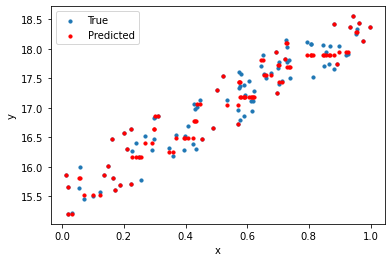

In [7]:
#plot
plt.scatter(x,y,s=10,label="True")
plt.scatter(x,predicted,color="r",s=10,label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [8]:
import graphviz
from sklearn.tree import export_graphviz

In [10]:
'''
dot_data = export_graphviz(decisionTreeModel,out_file=None,
feature_names=["x"],filled=True,rounded=True,special_characters=True)

graph = graphviz.Source(dot_data)

graph
'''

'\ndot_data = export_graphviz(decisionTreeModel,out_file=None,\nfeature_names=["x"],filled=True,rounded=True,special_characters=True)\n\ngraph = graphviz.Source(dot_data)\n\ngraph\n'